In [1]:
#Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch,VerticalPitch
from matplotlib import rcParams

# USE FILTER BELOW

In [2]:
df = pd.read_csv(r'C:\Users\Feele\Documents\Data\Sunderland\2122\Home\Wimbledon.csv')

In [3]:
df = df[df['teamId']==5955]
df = df[df['type/value']==1]
df = df[(df['y']>0) & (df['y'] <100)] #eliminate throws


In [4]:
#df['number'].value_counts(dropna = False)

df['name'].value_counts(dropna = False)

Hartigan       73
Heneghan       58
Nightingale    53
Woodyard       49
Tzanev         45
Alexander      42
Lawrence       39
McCormick      24
Palmer         18
Assal          15
Chislett       11
Pressley        7
Rudoni          6
Mebude          2
Name: name, dtype: int64

In [5]:
df = df[df['name']=='Hartigan'] #player

In [6]:
df['outcomeType/displayName'].value_counts(dropna = False)

Successful      55
Unsuccessful    18
Name: outcomeType/displayName, dtype: int64

In [7]:
df.head()

,id,minute,second,teamId,x,y,endX,endY,period/value,type/value,...,qualifiers/3/type/displayName,qualifiers/4/type/displayName,qualifiers/5/type/displayName,qualifiers/6/type/displayName,qualifiers/7/type/displayName,qualifiers/8/type/displayName,qualifiers/9/type/displayName,qualifiers/10/type/displayName,qualifiers/11/type/displayName,qualifiers/12/type/displayName
1,2321269243,0,3.0,5955,38.0,46.4,39.0,9.7,1,1,...,PassEndX,Angle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,2321272047,1,25.0,5955,34.3,74.1,9.8,54.0,1,1,...,Zone,Angle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,2321277013,4,0.0,5955,68.2,64.3,73.6,62.4,1,1,...,Length,HeadPass,Angle,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,2321278839,4,55.0,5955,25.6,80.8,4.2,55.1,1,1,...,PassEndY,PassEndX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,2321283759,7,16.0,5955,32.6,44.8,23.9,23.9,1,1,...,Angle,PassEndY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plotting and Pitch

In [8]:
# Inflating X and Y to pitch size (statsbomb pitches don't match with WhoScored data)

df['x'] = df['x']*1.2
df['endX'] = df['endX']*1.2
df['y'] = df['y']*.8
df['endY'] = df['endY']*.8
df['xdistance'] = df['xdistance']*1.2
df['ydistance'] = df['ydistance']*.8

## Pass Map

#### Light Pitch 

Background - #FFFFFF
lines - #B4B6BA

#### Dark Pitch

Background - #1B1B1B
lines - #c7d5cc

#### Blue Pitch (Primary colour)
Background - #0B0725
lines - #B4B6BA

In [9]:
#df.loc[(df['xdistance'] <= 18) & (df['ydistance'] <=13.5), 'PassType'] = 'Pass'
#df.loc[(df['xdistance'] > 18) & (df['ydistance'] >13.5), 'PassType'] = 'LongPass'

df.loc[(df['xdistance'] <= 18), 'PassType'] = 'Pass'
df.loc[(df['ydistance'] <=13.5), 'PassType'] = 'Pass1'

df.loc[(df['xdistance'] > 18) & (df['xdistance'] <=30), 'PassType'] = 'NormalPass'
df.loc[(df['ydistance'] > 13.5) & (df['ydistance'] <=20), 'PassType'] = 'NormalPass1'

df.loc[(df['xdistance'] > 30), 'PassType'] = 'LongPass'
df.loc[(df['ydistance'] > 20), 'PassType'] = 'LongPass1'



df['PassType'].value_counts(dropna = False)

#df1 = df.loc[df['outcomeType/displayName']=='Successful'].reset_index()
#df2 = df.loc[df['outcomeType/displayName']=='Unsuccessful'].reset_index()

Pass1          28
LongPass1      21
NormalPass1    14
LongPass        6
NormalPass      4
Name: PassType, dtype: int64

In [10]:
df1 = df.loc[df['PassType']=='Pass'].reset_index()
df2 = df.loc[df['PassType']=='Pass1'].reset_index()

df3 = df.loc[df['PassType']=='NormalPass'].reset_index()
df4 = df.loc[df['PassType']=='NormalPass1'].reset_index()


df5 = df.loc[df['PassType']=='LongPass'].reset_index()
df6 = df.loc[df['PassType']=='LongPass1'].reset_index()




In [11]:
frames = [df1,df2]
ShortPass = pd.concat(frames)

In [12]:
frames = [df3,df4]
NormalPass = pd.concat(frames)

In [13]:
frames = [df5,df6]
LongPass = pd.concat(frames)

In [14]:
#df.sort_values(by='PassType', ascending=True,na_position='first')

In [15]:
df.head()

,id,minute,second,teamId,x,y,endX,endY,period/value,type/value,...,qualifiers/4/type/displayName,qualifiers/5/type/displayName,qualifiers/6/type/displayName,qualifiers/7/type/displayName,qualifiers/8/type/displayName,qualifiers/9/type/displayName,qualifiers/10/type/displayName,qualifiers/11/type/displayName,qualifiers/12/type/displayName,PassType
1,2321269243,0,3.0,5955,45.60,37.12,46.80,7.76,1,1,...,Angle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LongPass1
28,2321272047,1,25.0,5955,41.16,59.28,11.76,43.20,1,1,...,Angle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NormalPass1
67,2321277013,4,0.0,5955,81.84,51.44,88.32,49.92,1,1,...,HeadPass,Angle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass1
90,2321278839,4,55.0,5955,30.72,64.64,5.04,44.08,1,1,...,PassEndX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LongPass1
124,2321283759,7,16.0,5955,39.12,35.84,28.68,19.12,1,1,...,PassEndY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NormalPass1


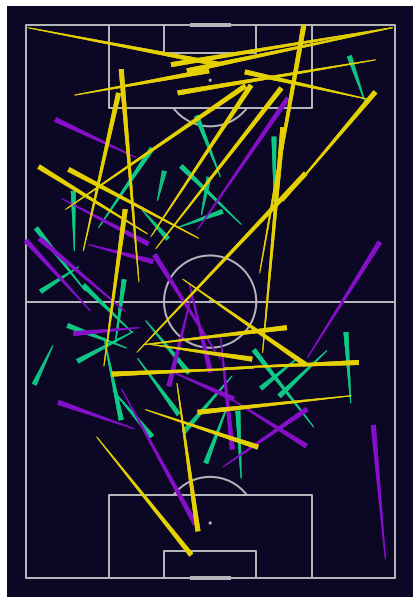

In [16]:
pitch = VerticalPitch(pitch_type='statsbomb',
                      line_color='#B4B6BA',
                      pitch_color='#0B0725')


fig,ax = pitch.draw(figsize=(13,8.5))
plt.gca().invert_xaxis()


pl1 = pitch.lines(df1.x,         
                  df1.y,
                  df1.endX,
                  df1.endY,
                  comet=True,
                  ax=ax,
                  color='#0FC986',
                  label='Successful')

pl2 = pitch.lines(df2.x,
                  df2.y,
                  df2.endX,
                  df2.endY,
                  comet=True,
                  ax=ax,
                  color='#0FC986',
                  Label='Unsuccessful')

pl3 = pitch.lines(df3.x,
                  df3.y,
                  df3.endX,
                  df3.endY,
                  comet=True,
                  ax=ax,
                  color='#860FC9',
                  Label='Unsuccessful') 

pl4 = pitch.lines(df4.x,
                  df4.y,
                  df4.endX,
                  df4.endY,
                  comet=True,
                  ax=ax,
                  color='#860FC9',
                  Label='Unsuccessful')  

pl5 = pitch.lines(df5.x,
                  df5.y,
                  df5.endX,
                  df5.endY,
                  comet=True,
                  ax=ax,
                  color='#E5D002',
                  Label='Unsuccessful')  

pl6 = pitch.lines(df6.x,
                  df6.y,
                  df6.endX,
                  df6.endY,
                  comet=True,
                  ax=ax,
                  color='#E5D002',
                  Label='Unsuccessful') 



plt.savefig('length.png',dpi=500,bbox_inches = 'tight') 

In [17]:
ShortPass.describe() 

#NormalPass.describe()

#LongPass.describe()


,index,id,minute,second,teamId,x,y,endX,endY,period/value,type/value,playerId,number,xdistance,ydistance
count,11.000000,1.100000e+01,11.000000,11.000000,11.0,11.000000,11.000000,11.000000,11.000000,11.000000,11.0,11.0,11.0,11.000000,11.000000
mean,736.181818,2.320129e+09,45.272727,30.545455,16.0,74.149091,21.549091,77.356364,29.643636,1.545455,1.0,294849.0,11.0,9.752727,14.203636
std,412.926584,3.396100e+04,26.795861,17.090135,0.0,24.241809,16.108960,30.083034,18.846355,0.522233,0.0,0.0,0.0,8.423298,5.104647
min,168.000000,2.320083e+09,9.000000,5.000000,16.0,35.160000,3.200000,22.800000,0.000000,1.000000,1.0,294849.0,11.0,1.200000,3.680000
25%,344.000000,2.320096e+09,20.500000,18.000000,16.0,65.220000,10.600000,66.540000,15.960000,1.000000,1.0,294849.0,11.0,4.440000,14.240000
50%,803.000000,2.320137e+09,49.000000,31.000000,16.0,74.880000,18.880000,86.280000,31.760000,2.000000,1.0,294849.0,11.0,5.400000,15.680000
75%,931.000000,2.320146e+09,57.500000,42.500000,16.0,79.980000,26.400000,98.460000,38.600000,2.000000,1.0,294849.0,11.0,15.300000,17.360000
max,1394.000000,2.320183e+09,90.000000,57.000000,16.0,114.960000,51.920000,113.280000,65.440000,2.000000,1.0,294849.0,11.0,27.120000,19.600000


In [17]:
df['outcomeType/displayName'].value_counts(dropna = False)

Successful      55
Unsuccessful    18
Name: outcomeType/displayName, dtype: int64

In [22]:
#ShortPass['outcomeType/displayName'].value_counts(dropna = False)

#NormalPass['outcomeType/displayName'].value_counts(dropna = False)

LongPass['outcomeType/displayName'].value_counts(dropna = False)




Successful      15
Unsuccessful    12
Name: outcomeType/displayName, dtype: int64

In [24]:
#Calculate the successful by overall total

15 / 27 *100 

#Round this to nearest whole number. That is % of accurate passes.

55.55555555555556